In [196]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
import numpy as np
%run functions.ipynb

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from gensim.parsing.porter import PorterStemmer
from nltk.probability import FreqDist
from nrclex import NRCLex
import collections, functools, operator

porter_stemmer = PorterStemmer()
filtered_sent=[]
stemmed_words=[]
all_words_clean = []

def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50,cumulative=False)
    plt.show()

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")

def top_nwords_graph(top10):
    data = dict(top10)
    courses = (data.keys())
    values =  (data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color ='blue',
            width = 0.4)

    plt.xlabel("Bad reviews")
    plt.ylabel("Number of times mentioned")
    plt.title("Total number of times mentioned")
    plt.show()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bryon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bryon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [197]:
df = pd.read_csv('all_reviews.csv')
df = neg_reviews(df)
df

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4
1264,Furama City Centre,NaN,"Smelly room, room is cleaned once in 3 days.",1.0,16-Sep-22,NaN
1265,Furama City Centre,NaN,Electricity out for 2 days so had to get staff...,1.0,8-Oct-22,NaN
2037,Hilton Singapore Orchard (SG Clean),NaN,"Arrived late at night after a long flight, and...",1.0,7-Aug-22,NaN
3022,Hotel Royal,NaN,Dirty toilet and dirty bedcover 👎.,1.0,10-Oct-22,NaN
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN
...,...,...,...,...,...,...
9295,York Hotel Singapore,NaN,Worst stayed at York Singapore. When we checke...,4.0,May-22,NaN
9308,York Hotel Singapore,NaN,Disappointed. We asked for another room as the...,4.0,Oct-19,NaN
9317,York Hotel Singapore,NaN,Room was not soundproof and the room was overp...,4.0,Sep-19,NaN
9328,York Hotel Singapore,NaN,We had a four day stop over after coming from ...,4.0,Nov-19,NaN


In [198]:
all_words = [word.lower() for sent in df['Content'] for word in word_tokenize(sent)]
print(all_words)

['smelly', 'room', ',', 'room', 'is', 'cleaned', 'once', 'in', '3', 'days', '.', 'electricity', 'out', 'for', '2', 'days', 'so', 'had', 'to', 'get', 'staff', 'to', 'open', 'my', 'room', 'door', ',', 'as', 'card', 'key', 'did', "n't", 'work', 'throughout', 'entire', 'stay', '.', '8th', 'floor', 'room', 'with', 'no', 'window', 'just', 'a', "''", 'view', "''", 'into', 'foyer', '.', 'is', 'that', 'a', 'superior', 'room', 'lol', '?', 'no', 'room', 'cleaning', 'during', 'stay', ',', 'one', 'person', 'only', 'at', 'reception', 'most', 'of', 'the', 'time', ',', 'staff', 'helpful', 'and', 'friendly', 'but', 'got', 'the', 'impression', 'the', 'hotel', 'is', 'now', 'quite', 'run', 'down', 'and', 'in', 'need', 'of', 'investment', ',', 'have', 'stayed', 'there', 'regularly', 'for', 'last', '20', 'years', 'so', 'feel', 'i', 'have', 'a', 'perspective', '.', 'arrived', 'late', 'at', 'night', 'after', 'a', 'long', 'flight', ',', 'and', 'was', 'welcomed', 'by', 'a', 'messy', 'leak', 'in', 'the', 'bathro

In [199]:
#Specify stopword list
stopwords_english = set(stopwords.words('english'))
stopwords_english.update(['hotel', 'would', 'us','get','come','back','nt','could','good','great','one','rooms'])
#Create a new list of words by removing stopwords and punctuation from all_words

for word in all_words:
    if word not in stopwords_english and not word.isdigit():
        punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
        if len(punc_free)>=2:
            # stem word to root word
            all_words_clean.append(punc_free)
print(all_words_clean)

['smelly', 'room', 'room', 'cleaned', 'days', 'electricity', 'days', 'staff', 'open', 'room', 'door', 'card', 'key', 'nt', 'work', 'throughout', 'entire', 'stay', '8th', 'floor', 'room', 'window', 'view', 'foyer', 'superior', 'room', 'lol', 'room', 'cleaning', 'stay', 'person', 'reception', 'time', 'staff', 'helpful', 'friendly', 'got', 'impression', 'quite', 'run', 'need', 'investment', 'stayed', 'regularly', 'last', 'years', 'feel', 'perspective', 'arrived', 'late', 'night', 'long', 'flight', 'welcomed', 'messy', 'leak', 'bathroom', 'location', 'service', 'need', 'lot', 'improved', 'since', 'changed', 'name', 'mandarin', 'orchard', 'hilton', 'needs', 'much', 'better', 'dirty', 'toilet', 'dirty', 'bedcover', 'booking', 'expedia', 'confirmed', 'paid', 'upon', 'checking', 'shocked', 'informed', 'booking', 'transferred', 'aqueen', 'joo', 'chiat', 'running', 'full', 'house', 'refused', 'accept', 'arrangement', 'refund', 'possible', 'booking', 'expedia', 'explanation', 'first', 'given', 'f

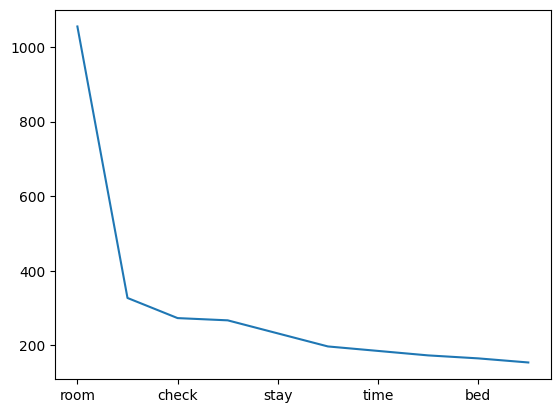

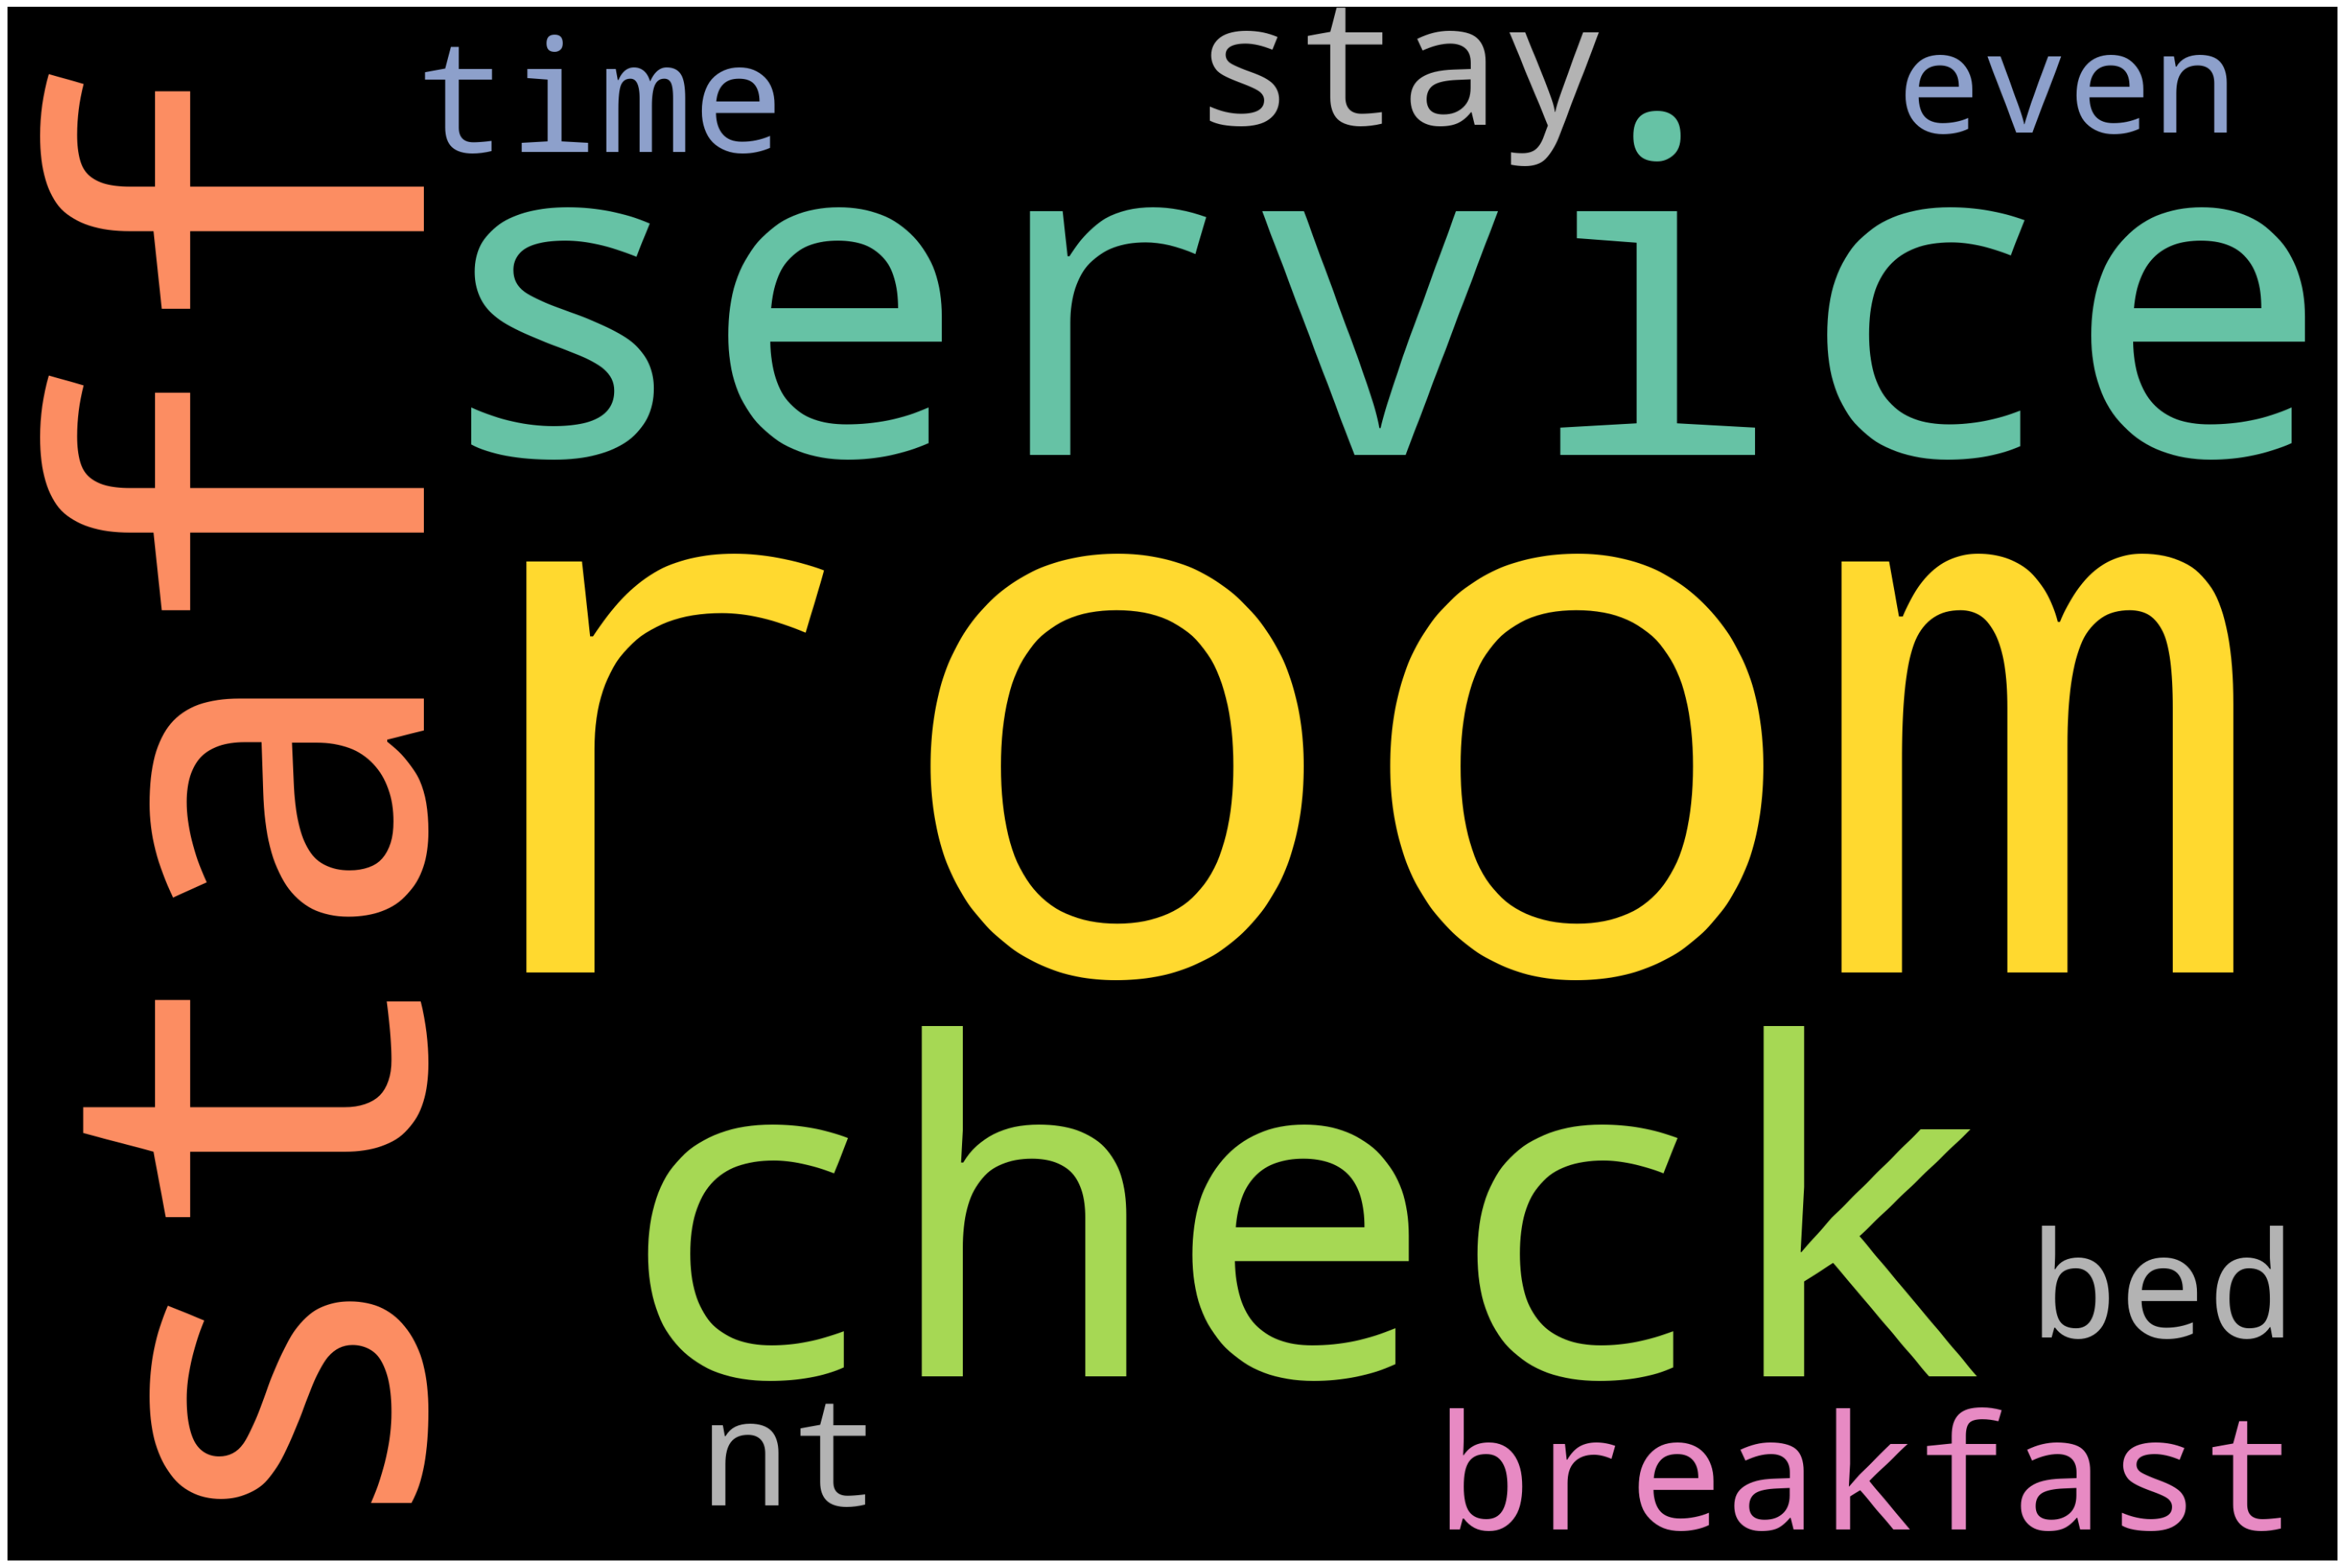

In [200]:

clean_words_frequency = FreqDist(all_words_clean)
top10 = clean_words_frequency.most_common(10)
most_common = clean_words_frequency.most_common(10)
most_common = pd.Series(dict(most_common))
most_common.plot()
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=most_common)

# Plot
plot_cloud(wordcloud)

In [201]:
top10

[('room', 1055),
 ('staff', 327),
 ('check', 273),
 ('service', 267),
 ('stay', 232),
 ('breakfast', 197),
 ('time', 185),
 ('nt', 173),
 ('bed', 165),
 ('even', 154)]

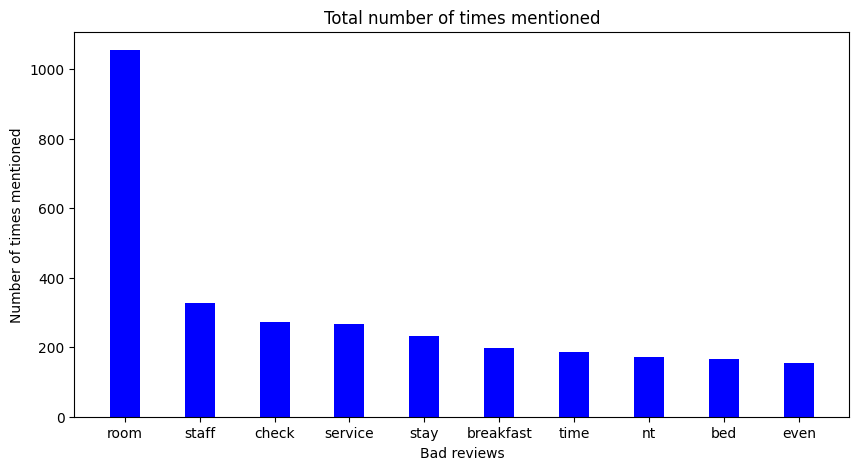

In [202]:
top_nwords_graph(top10)

In [203]:
top10_words=[]
for i in top10:
    top10_words.append(i[0])
print(top10_words)
list=[]
for review in df['Content']:
    for i in top10:
        if i[0] in review:
            list.append(review)
            break
filtered_review = pd.DataFrame(list)
filtered_review

['room', 'staff', 'check', 'service', 'stay', 'breakfast', 'time', 'nt', 'bed', 'even']


,0
0,"Smelly room, room is cleaned once in 3 days."
1,Electricity out for 2 days so had to get staff...
2,"Arrived late at night after a long flight, and..."
3,Dirty toilet and dirty bedcover 👎.
4,My booking with Expedia was confirmed and paid...
...,...
678,Worst stayed at York Singapore. When we checke...
679,Disappointed. We asked for another room as the...
680,Room was not soundproof and the room was overp...
681,We had a four day stop over after coming from ...


In [204]:
#['room', 'staff', 'check', 'service', 'stay', 'breakfast', 'time', 'nt', 'bed', 'even']


room_reviews = []

staff_reviews = []

check_reviews = []

service_reviews = []

stay_reviews = []

breakfast_reviews = []

time_reviews = []

nt_reviews = []

bed_reviews = []

even_reviews = []

for review in filtered_review[0]:
    for j in range(len(top10_words)):
        if j == 0:
            if top10_words[j] in review:
                room_reviews.append(review)
        elif j == 1:
            if top10_words[j] in review:
                staff_reviews.append(review)
        elif j == 2:
            if top10_words[j] in review:
                check_reviews.append(review)
        elif j == 3:
            if top10_words[j] in review:
                service_reviews.append(review)
        elif j == 4:
            if top10_words[j] in review:
                stay_reviews.append(review)
        elif j == 5:
            if top10_words[j] in review:
                breakfast_reviews.append(review)
        elif j == 6:
            if top10_words[j]in review:
                time_reviews.append(review)
        elif j == 7:
            if top10_words[j]in review:
                nt_reviews.append(review)
        elif j == 8:
            if top10_words[j]in review:
                bed_reviews.append(review)
        elif j == 9:
            if top10_words[j]in review:
                even_reviews.append(review)
                

In [205]:
#['room', 'staff', 'check', 'service', 'stay', 'breakfast', 'time', 'nt', 'bed', 'even']

room_review = pd.DataFrame(room_reviews)
staff_review = pd.DataFrame(staff_reviews)
check_review = pd.DataFrame(check_reviews)
service_review = pd.DataFrame(service_reviews)
stay_review = pd.DataFrame(stay_reviews)
breakfast_review = pd.DataFrame(breakfast_reviews)
time_review = pd.DataFrame(time_reviews)
nt_review = pd.DataFrame(nt_reviews)
bed_review = pd.DataFrame(bed_reviews)
even_review = pd.DataFrame(even_reviews)


In [206]:
def split_by_hotel(df,df_column):
    test_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
    unique_hotel_name=[]
    for hotel in df['Hotel Name']:
        unique_hotel_name.append(hotel)
    unique_hotel_name=set(unique_hotel_name)
    for hotel in range(len(unique_hotel_name)):
        gb = df.groupby(df['Hotel Name'])    
    return [gb.get_group(x) for x in gb.groups]

unique_hotel_name=[]
for hotel in df['Hotel Name']:
        unique_hotel_name.append(hotel)
unique_hotel_name=set(unique_hotel_name) 

In [207]:
room_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in room_review[0]:
    room_df= pd.concat([room_df,df.loc[df['Content']==i]])
room_df['Popular_Word'] = 'room'
room_df.sort_values(by=['Hotel Name'])

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
2,Andaz Singapore - a concept by Hyatt,NaN,Not good service. baggage send to my room to s...,3.0,30-Sep-18,NaN,room
67,Aqueen Hotel Paya Lebar,NaN,The Hotel looks ok. Is a bit smaller then it's...,4.0,14-Aug-15,NaN,room
94,Aqueen Hotel Paya Lebar,NaN,My experience: First we were booked to an insi...,4.0,28-Aug-15,NaN,room
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN,room
102,Aqueen Hotel Paya Lebar,NaN,For the first time stayed in a room without an...,4.0,7-Aug-16,NaN,room
...,...,...,...,...,...,...,...
9133,York Hotel Singapore,NaN,improve your cleanliness standard before selli...,2.0,Jan-20,NaN,room
9131,York Hotel Singapore,NaN,Very disappointing and unimpressive as first t...,2.0,Jan-20,NaN,room
9072,York Hotel Singapore,NaN,"When we open the cupboard, we see used towel a...",2.0,31-Jul-22,NaN,room
9360,York Hotel Singapore,NaN,"It was a simple stayca with family, we booked ...",2.0,Nov-21,NaN,room


In [208]:
staff_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in staff_review[0]:
    staff_df= pd.concat([staff_df,df.loc[df['Content']==i]])
staff_df['Popular_Word'] = 'room'
staff_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
94,Aqueen Hotel Paya Lebar,NaN,My experience: First we were booked to an insi...,4.0,28-Aug-15,NaN,room
102,Aqueen Hotel Paya Lebar,NaN,For the first time stayed in a room without an...,4.0,7-Aug-16,NaN,room
129,Ascott Raffles Place Singapore (SG Clean),NaN,Should be listed on a different site as its an...,4.0,24-Mar-20,NaN,room
378,Carlton City Hotel Singapore (SG Clean),NaN,I asked for a 30 min early check-in and the st...,4.0,29-May-18,NaN,room
312,Carlton City Hotel Singapore (SG Clean),NaN,My check-in was processed by a staff (Shi Mei)...,4.0,9-Jun-19,NaN,room
...,...,...,...,...,...,...,...
9235,York Hotel Singapore,NaN,The hotel service is quite poor. Very unsatisf...,4.0,Jun-22,NaN,room
9163,York Hotel Singapore,NaN,At first we were staying in room 537 where it ...,4.0,Jun-21,NaN,room
9214,York Hotel Singapore,NaN,Staying during the no dine in period. No staff...,4.0,May-21,NaN,room
9360,York Hotel Singapore,NaN,"It was a simple stayca with family, we booked ...",2.0,Nov-21,NaN,room


In [209]:
check_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in check_review[0]:
    check_df= pd.concat([check_df,df.loc[df['Content']==i]])
check_df['Popular_Word'] = 'nt'
check_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN,nt
94,Aqueen Hotel Paya Lebar,NaN,My experience: First we were booked to an insi...,4.0,28-Aug-15,NaN,nt
136,Ascott Raffles Place Singapore (SG Clean),NaN,We had an agreement: I check out 4 nights befo...,2.0,14-Dec-20,NaN,nt
244,Ascott Raffles Place Singapore (SG Clean),NaN,"Service, cleaniness and location is really goo...",2.0,16-Feb-18,NaN,nt
378,Carlton City Hotel Singapore (SG Clean),NaN,I asked for a 30 min early check-in and the st...,4.0,29-May-18,NaN,nt
...,...,...,...,...,...,...,...
9193,York Hotel Singapore,NaN,All good la but the ice box not cool to keep f...,2.0,Mar-21,NaN,nt
9300,York Hotel Singapore,NaN,Service is very poor and not friendly. Like th...,2.0,Aug-22,NaN,nt
9301,York Hotel Singapore,NaN,I was booked to stay at the York Hotel for fou...,2.0,Dec-19,NaN,nt
9360,York Hotel Singapore,NaN,"It was a simple stayca with family, we booked ...",2.0,Nov-21,NaN,nt


In [210]:
service_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in service_review[0]:
    service_df= pd.concat([service_df,df.loc[df['Content']==i]])
service_df['Popular_Word'] = 'call'
service_df.sort_values(by=['Hotel Name'])

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
2,Andaz Singapore - a concept by Hyatt,NaN,Not good service. baggage send to my room to s...,3.0,30-Sep-18,NaN,call
208,Ascott Raffles Place Singapore (SG Clean),NaN,I planned a staycation after watching show in ...,2.0,8-Sep-15,NaN,call
129,Ascott Raffles Place Singapore (SG Clean),NaN,Should be listed on a different site as its an...,4.0,24-Mar-20,NaN,call
196,Ascott Raffles Place Singapore (SG Clean),NaN,What a lovely looking room we found at the Asc...,4.0,4-Oct-11,NaN,call
312,Carlton City Hotel Singapore (SG Clean),NaN,My check-in was processed by a staff (Shi Mei)...,4.0,9-Jun-19,NaN,call
...,...,...,...,...,...,...,...
9172,York Hotel Singapore,NaN,Overall the room is normal. Old but clean. The...,2.0,Nov-21,NaN,call
9178,York Hotel Singapore,NaN,Grumpy service staff from point of entry to ...,2.0,Aug-21,NaN,call
9260,York Hotel Singapore,NaN,"Don't book here. The place is outdated, servic...",2.0,Jun-22,NaN,call
9235,York Hotel Singapore,NaN,The hotel service is quite poor. Very unsatisf...,4.0,Jun-22,NaN,call


In [211]:
stay_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in stay_review[0]:
    stay_df= pd.concat([stay_df,df.loc[df['Content']==i]])
stay_df['Popular_Word'] = 'breakfast'
stay_df.sort_values(by=['Hotel Name'])

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
92,Aqueen Hotel Paya Lebar,NaN,Hotel is clean and modern. Receptionists spea...,4.0,5-Jun-17,NaN,breakfast
116,Aqueen Hotel Paya Lebar,NaN,The hotel sound proof is terrible. You can hea...,2.0,24-Nov-15,NaN,breakfast
102,Aqueen Hotel Paya Lebar,NaN,For the first time stayed in a room without an...,4.0,7-Aug-16,NaN,breakfast
208,Ascott Raffles Place Singapore (SG Clean),NaN,I planned a staycation after watching show in ...,2.0,8-Sep-15,NaN,breakfast
244,Ascott Raffles Place Singapore (SG Clean),NaN,"Service, cleaniness and location is really goo...",2.0,16-Feb-18,NaN,breakfast
...,...,...,...,...,...,...,...
9175,York Hotel Singapore,NaN,It is my second time at York Hotel and it was ...,2.0,Oct-21,NaN,breakfast
9193,York Hotel Singapore,NaN,All good la but the ice box not cool to keep f...,2.0,Mar-21,NaN,breakfast
9301,York Hotel Singapore,NaN,I was booked to stay at the York Hotel for fou...,2.0,Dec-19,NaN,breakfast
9295,York Hotel Singapore,NaN,Worst stayed at York Singapore. When we checke...,4.0,May-22,NaN,breakfast


In [212]:
breakfast_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in breakfast_review[0]:
    breakfast_df= pd.concat([breakfast_df,df.loc[df['Content']==i]])
breakfast_df['Popular_Word'] = 'night'
breakfast_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
92,Aqueen Hotel Paya Lebar,NaN,Hotel is clean and modern. Receptionists spea...,4.0,5-Jun-17,NaN,night
196,Ascott Raffles Place Singapore (SG Clean),NaN,What a lovely looking room we found at the Asc...,4.0,4-Oct-11,NaN,night
417,Carlton City Hotel Singapore (SG Clean),NaN,Everything was poor. Check-in staff does not b...,2.0,3-Dec-18,NaN,night
560,Carlton Hotel Singapore,NaN,I am currently serving my SHN at Carlton hotel...,2.0,Aug-21,NaN,night
640,Carlton Hotel Singapore,NaN,Booked a 1-night stay at Carlton Hotel from Kl...,2.0,Apr-21,NaN,night
...,...,...,...,...,...,...,...
9151,York Hotel Singapore,NaN,The reception staff and the location are good....,2.0,Dec-19,NaN,night
9142,York Hotel Singapore,NaN,Though the location is probably ok (a bit of a...,2.0,Mar-20,NaN,night
9163,York Hotel Singapore,NaN,At first we were staying in room 537 where it ...,4.0,Jun-21,NaN,night
9284,York Hotel Singapore,NaN,Rooms and lobby etc. were very dated - wallpap...,4.0,Aug-22,NaN,night


In [213]:
time_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in time_review[0]:
    time_df= pd.concat([time_df,df.loc[df['Content']==i]])
time_df['Popular_Word'] = 'staff'
time_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
102,Aqueen Hotel Paya Lebar,NaN,For the first time stayed in a room without an...,4.0,7-Aug-16,NaN,staff
208,Ascott Raffles Place Singapore (SG Clean),NaN,I planned a staycation after watching show in ...,2.0,8-Sep-15,NaN,staff
196,Ascott Raffles Place Singapore (SG Clean),NaN,What a lovely looking room we found at the Asc...,4.0,4-Oct-11,NaN,staff
378,Carlton City Hotel Singapore (SG Clean),NaN,I asked for a 30 min early check-in and the st...,4.0,29-May-18,NaN,staff
372,Carlton City Hotel Singapore (SG Clean),NaN,"When arriving at Carlton City at 6pm, my room ...",2.0,3-Nov-18,NaN,staff
...,...,...,...,...,...,...,...
9288,York Hotel Singapore,NaN,York Hotel Singapore Singapore Very average ...,4.0,Aug-22,NaN,staff
9170,York Hotel Singapore,NaN,Please focus on cleaning your room and check e...,4.0,Aug-21,NaN,staff
9257,York Hotel Singapore,NaN,It was not worth the price I paid. staff was n...,4.0,Jun-22,NaN,staff
9327,York Hotel Singapore,NaN,Will not return to the hotel again as the ser...,2.0,Nov-19,NaN,staff


In [214]:
nt_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in nt_review[0]:
    nt_df= pd.concat([nt_df,df.loc[df['Content']==i]])
nt_df['Popular_Word'] = 'taxi'
nt_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN,taxi
37,Aqueen Hotel Paya Lebar,NaN,"a hotel without a bar, cafe or restaurant is a...",4.0,16-Jun-22,NaN,taxi
67,Aqueen Hotel Paya Lebar,NaN,The Hotel looks ok. Is a bit smaller then it's...,4.0,14-Aug-15,NaN,taxi
92,Aqueen Hotel Paya Lebar,NaN,Hotel is clean and modern. Receptionists spea...,4.0,5-Jun-17,NaN,taxi
94,Aqueen Hotel Paya Lebar,NaN,My experience: First we were booked to an insi...,4.0,28-Aug-15,NaN,taxi
...,...,...,...,...,...,...,...
9102,York Hotel Singapore,NaN,The service at York Hotels is the worst servic...,2.0,Dec-20,NaN,taxi
9072,York Hotel Singapore,NaN,"When we open the cupboard, we see used towel a...",2.0,31-Jul-22,NaN,taxi
9068,York Hotel Singapore,NaN,The shower tap was not working well. Reported ...,2.0,23-Aug-22,NaN,taxi
9151,York Hotel Singapore,NaN,The reception staff and the location are good....,2.0,Dec-19,NaN,taxi


In [215]:
bed_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in bed_review[0]:
    bed_df= pd.concat([bed_df,df.loc[df['Content']==i]])
bed_df['Popular_Word'] = 'even'
bed_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
67,Aqueen Hotel Paya Lebar,NaN,The Hotel looks ok. Is a bit smaller then it's...,4.0,14-Aug-15,NaN,even
94,Aqueen Hotel Paya Lebar,NaN,My experience: First we were booked to an insi...,4.0,28-Aug-15,NaN,even
196,Ascott Raffles Place Singapore (SG Clean),NaN,What a lovely looking room we found at the Asc...,4.0,4-Oct-11,NaN,even
372,Carlton City Hotel Singapore (SG Clean),NaN,"When arriving at Carlton City at 6pm, my room ...",2.0,3-Nov-18,NaN,even
654,Carlton Hotel Singapore,NaN,Very badly surprised by this hotel which is no...,4.0,May-19,NaN,even
...,...,...,...,...,...,...,...
9308,York Hotel Singapore,NaN,Disappointed. We asked for another room as the...,4.0,Oct-19,NaN,even
9142,York Hotel Singapore,NaN,Though the location is probably ok (a bit of a...,2.0,Mar-20,NaN,even
9131,York Hotel Singapore,NaN,Very disappointing and unimpressive as first t...,2.0,Jan-20,NaN,even
9301,York Hotel Singapore,NaN,I was booked to stay at the York Hotel for fou...,2.0,Dec-19,NaN,even


In [216]:
even_df = pd.DataFrame(columns=['Hotel Name', 'Title', 'Content','Rating','Date of stay'])
for i in even_review[0]:
    even_df= pd.concat([even_df,df.loc[df['Content']==i]])
even_df['Popular_Word'] = 'stayed'
even_df.sort_values(by=['Hotel Name'])


,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4,Popular_Word
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN,stayed
116,Aqueen Hotel Paya Lebar,NaN,The hotel sound proof is terrible. You can hea...,2.0,24-Nov-15,NaN,stayed
417,Carlton City Hotel Singapore (SG Clean),NaN,Everything was poor. Check-in staff does not b...,2.0,3-Dec-18,NaN,stayed
693,Carlton Hotel Singapore,NaN,I have stayed at Carlton hotel Singpaore befor...,2.0,Jul-19,NaN,stayed
612,Carlton Hotel Singapore,NaN,"As from check in, or even before, it all went ...",2.0,Dec-20,NaN,stayed
...,...,...,...,...,...,...,...
9151,York Hotel Singapore,NaN,The reception staff and the location are good....,2.0,Dec-19,NaN,stayed
9175,York Hotel Singapore,NaN,It is my second time at York Hotel and it was ...,2.0,Oct-21,NaN,stayed
9178,York Hotel Singapore,NaN,Grumpy service staff from point of entry to ...,2.0,Aug-21,NaN,stayed
9270,York Hotel Singapore,NaN,Overall the room looks disgusting because some...,4.0,Sep-22,NaN,stayed


In [217]:
print(even_df)

                                   Hotel Name Title  \
28                    Aqueen Hotel Paya Lebar   NaN   
116                   Aqueen Hotel Paya Lebar   NaN   
417   Carlton City Hotel Singapore (SG Clean)   NaN   
461                   Carlton Hotel Singapore   NaN   
545                   Carlton Hotel Singapore   NaN   
...                                       ...   ...   
8929  YOTEL Singapore Orchard Road (SG Clean)   NaN   
9163                     York Hotel Singapore   NaN   
9214                     York Hotel Singapore   NaN   
9270                     York Hotel Singapore   NaN   
9317                     York Hotel Singapore   NaN   

                                                Content  Rating Date of stay  \
28    My booking with Expedia was confirmed and paid...     2.0    30-Nov-17   
116   The hotel sound proof is terrible. You can hea...     2.0    24-Nov-15   
417   Everything was poor. Check-in staff does not b...     2.0     3-Dec-18   
461   It was a impr

In [218]:
#['room', 'staff', 'check', 'service', 'stay', 'breakfast', 'time', 'nt', 'bed', 'even']
unique_df = concat_dataframes_get_unique_hotels(room_df, staff_df,check_df,service_df,stay_df,breakfast_df,time_df,nt_df,bed_df,even_df)

In [219]:
print(unique_df)

                                Hotel_Name Title  \
2     Andaz Singapore - a concept by Hyatt   NaN   
2     Andaz Singapore - a concept by Hyatt   NaN   
116                Aqueen Hotel Paya Lebar   NaN   
92                 Aqueen Hotel Paya Lebar   NaN   
102                Aqueen Hotel Paya Lebar   NaN   
...                                    ...   ...   
9288                  York Hotel Singapore   NaN   
9295                  York Hotel Singapore   NaN   
9308                  York Hotel Singapore   NaN   
9317                  York Hotel Singapore   NaN   
9361                  York Hotel Singapore   NaN   

                                                Content  Rating Date of stay  \
2     Not good service. baggage send to my room to s...     3.0    30-Sep-18   
2     Not good service. baggage send to my room to s...     3.0    30-Sep-18   
116   The hotel sound proof is terrible. You can hea...     2.0    24-Nov-15   
92    Hotel is clean and modern.  Receptionists spea...

In [220]:
 #get unique hotel names
UniqueNames = unique_df.Hotel_Name.unique()

#create a data frame dictionary to store your data frames
UniqueHotel = {elem : pd.DataFrame() for elem in UniqueNames}

for key in UniqueHotel.keys():
    UniqueHotel[key] = unique_df[:][unique_df.Hotel_Name == key]
list_of_unique_hotel_df=unique_hotels_df(UniqueNames)

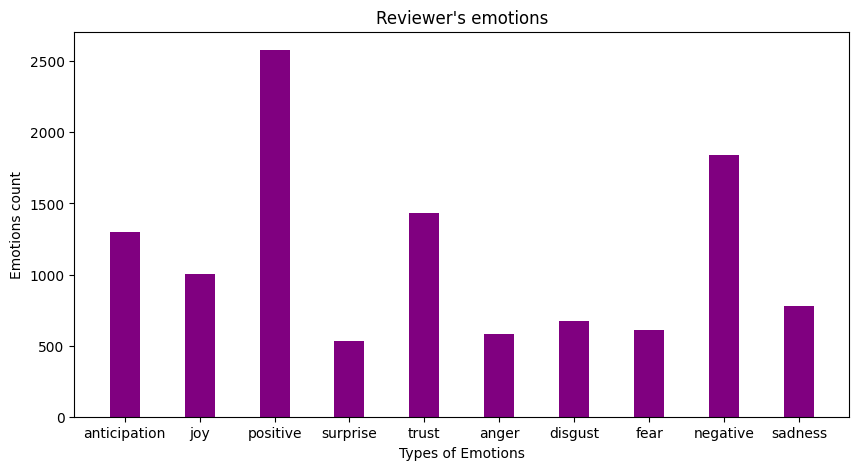

In [221]:
graph_for_reviewers_emotions(list_of_unique_hotel_df)

C:\Users\Bryon\AppData\Local\Temp\ipykernel_3132\1204423449.py:255: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_ratings = overall_df.groupby('Hotel Name').mean()


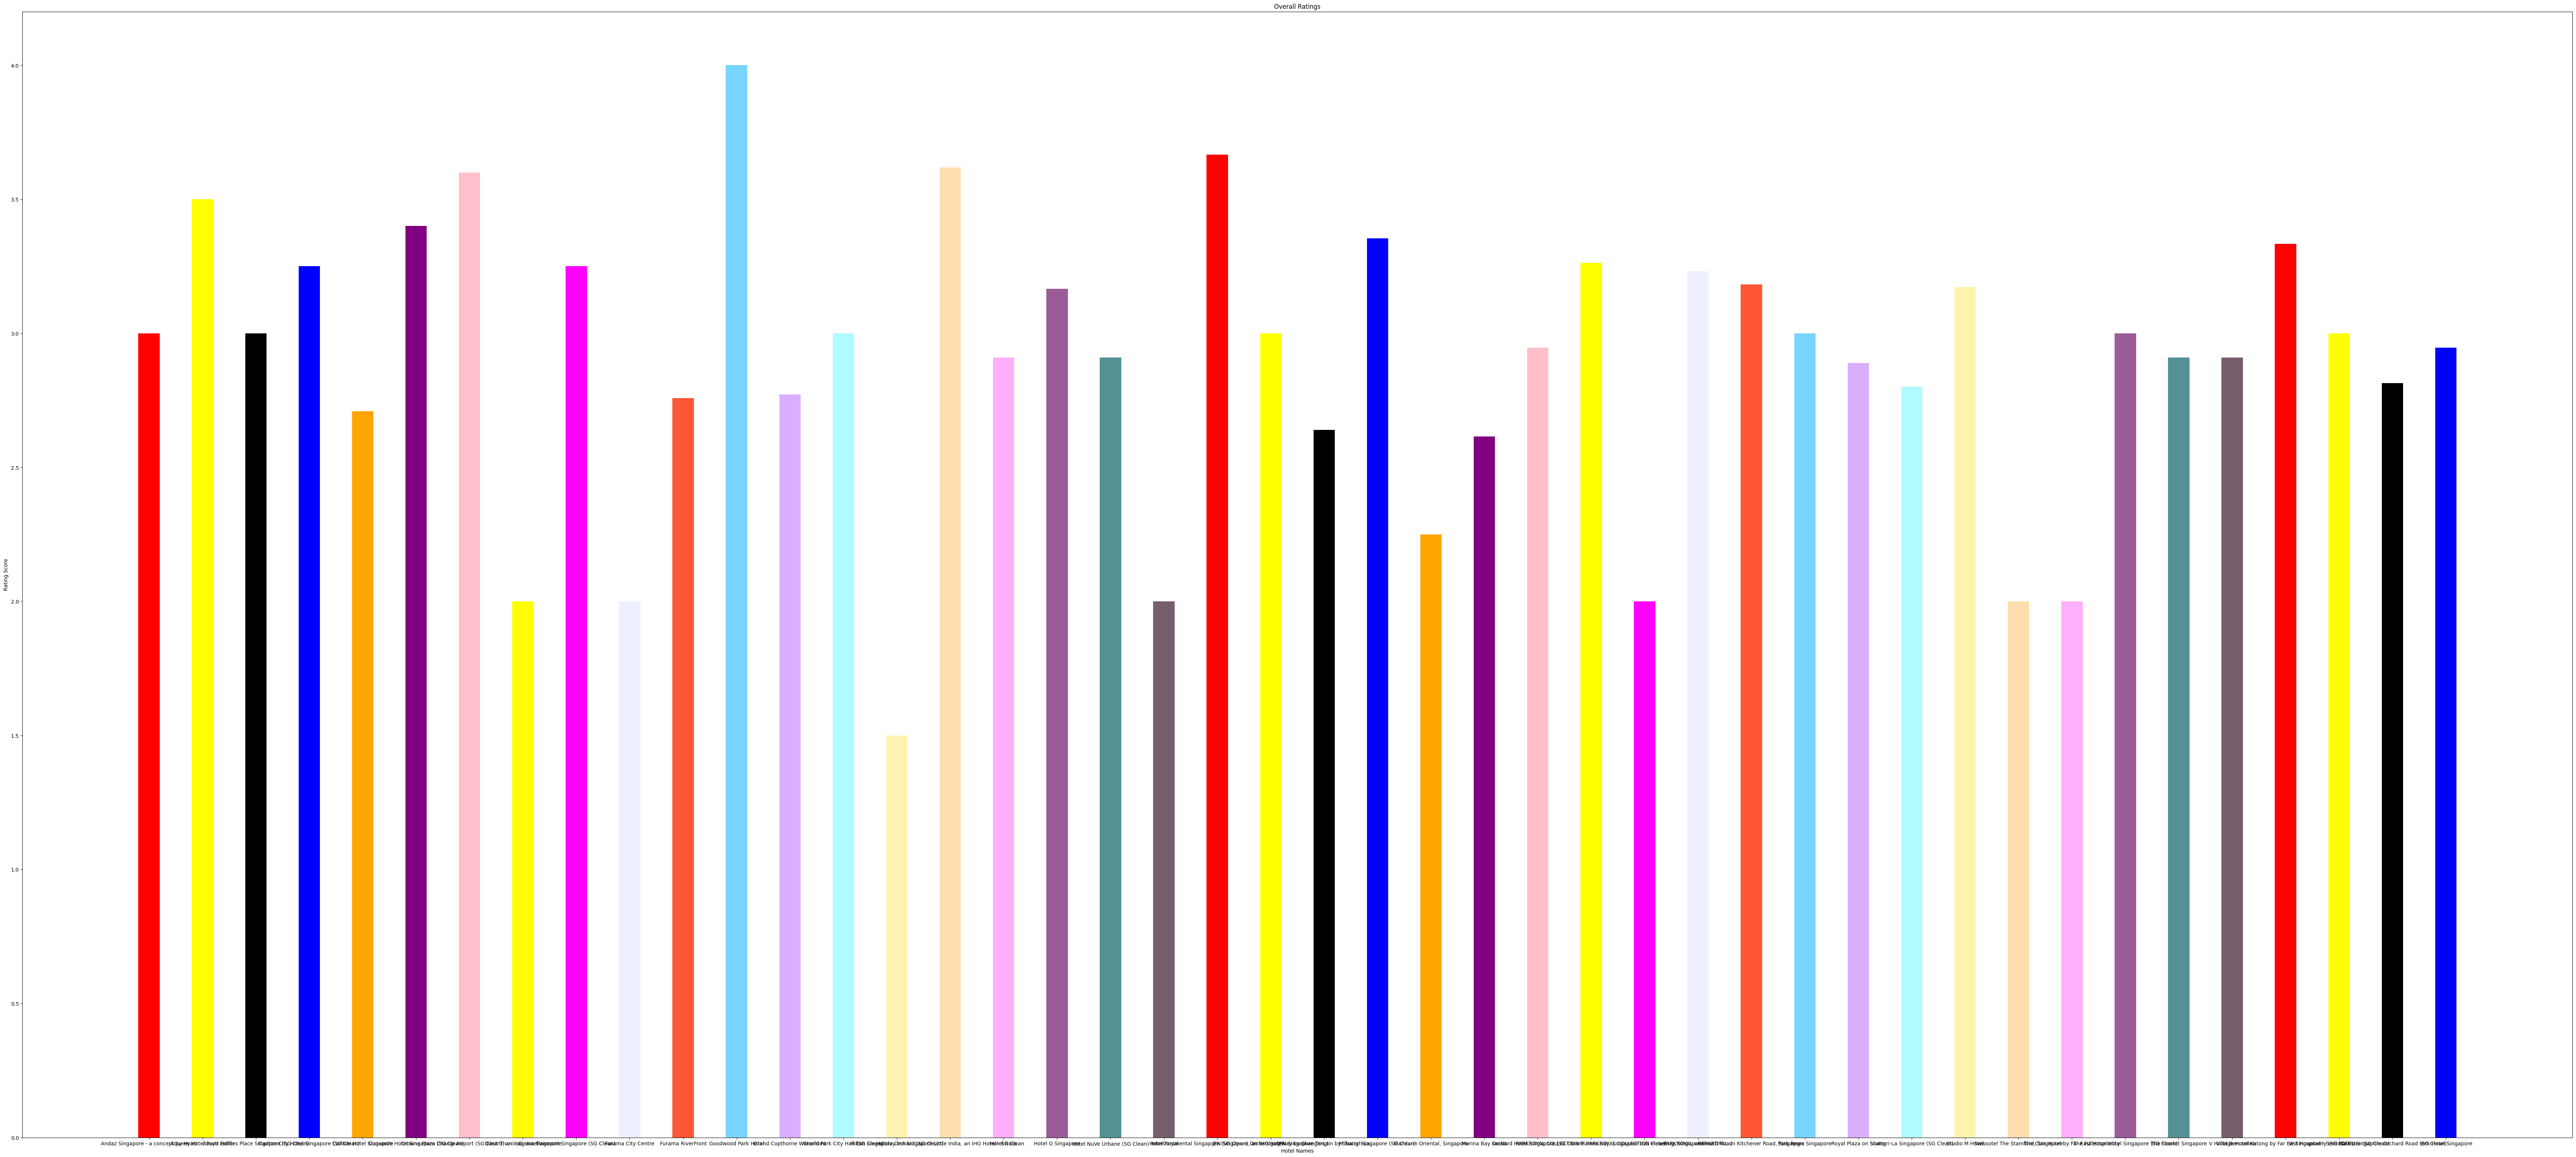

In [222]:
graph_for_overall_rating(df, UniqueNames)